In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq

In [3]:
df = pd.read_csv("Datendemo-Fahrt.csv", encoding="latin1", delimiter=";")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("#", "Num")
df["Größe"] = df["Größe"].str.replace(",", ".").astype(float)
df = df.drop(columns=["Unnamed:_5", "Unnamed:_6"], errors="ignore")
display(df.head())

,Person,Größe,Num_Geschwister,Schulweg_min,Schulweg_km
0,NaN,1.58,1,7,4
1,NaN,1.67,0,20,12
2,NaN,1.86,1,20,8
3,NaN,1.75,2,14,6
4,NaN,1.74,2,2,1


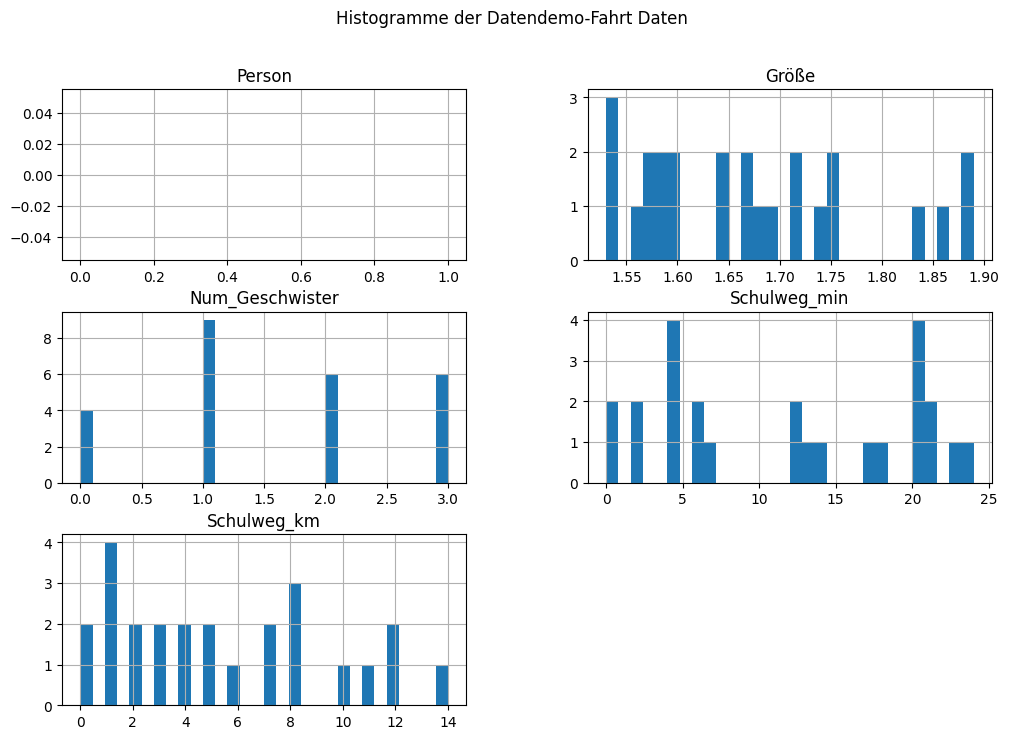

In [4]:
def plot_histograms(dataframe, title):
    dataframe.hist(figsize=(12, 8), bins=30)
    plt.suptitle(title)
    plt.show()

plot_histograms(df, "Histogramme der Datendemo-Fahrt Daten")


In [50]:
def lorenz_curve(values, fill_areas=True,show_gini=False):
    column_name = values.name 
    values = np.sort(values)  # Sort values
    cum_values = np.cumsum(values)  # Cumulative sum
    total = cum_values[-1]
    lorenz = np.insert(cum_values / total, 0, 0)  # Normalize
    x = np.linspace(0, 1, len(lorenz))
    
    fig, ax = plt.subplots()
    ax.plot(x, lorenz, drawstyle='steps-post', label="Lorenzkurve")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Gleichverteilung")

    if fill_areas:
        ax.fill_between(x, 0, lorenz, color='blue', alpha=0.3, label="")
        ax.fill_between(x, lorenz, x, color='red', alpha=0.2, label="")
    
    ax.set_title(column_name)
    ax.set_xlabel("Bevölkerungsanteil geordnet")
    ax.set_ylabel("Kumulierte Variable")
    ax.legend()
    plt.show()
    
    # Gini-Koeffizient berechnen
    if show_gini == True:
        gini = 1 - 2 * np.trapz(lorenz, x)
        print(f" Der Gini-Koeffizient für {column_name} ist {gini:.4f}.")    

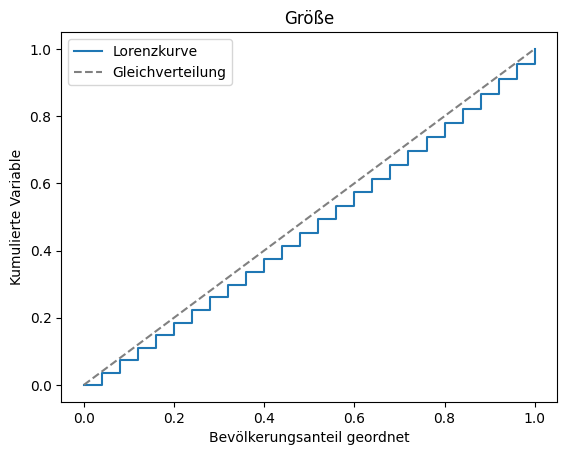

 Der Gini-Koeffizient für Größe ist 0.0367.


In [53]:
lorenz_curve(df["Größe"].dropna(), fill_areas=False, show_gini=True)
#print(f"Gini-Koeffizient für Größe: {gini:.4f}")

In [17]:
df.Num_Geschwister.name

'Num_Geschwister'

In [25]:
# Lorenz Curve and Gini coefficient
def lorenz_curve(values, fill_areas=True):
    column_name = values.name  # Retrieve column name automatically
    values = np.sort(values)  # Sort values
    cum_values = np.cumsum(values)  # Cumulative sum
    total = cum_values[-1]
    lorenz = np.insert(cum_values / total, 0, 0)  # Normalize
    x = np.linspace(0, 1, len(lorenz))
    
    fig, ax = plt.subplots()
    ax.plot(x, lorenz, drawstyle='steps-post', label=f"Lorenz-Kurve ({column_name})")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Gleichverteilung")
    
    # Fill areas if enabled
    if fill_areas:
        ax.fill_between(x, lorenz, color='blue', alpha=0.3, label="Fläche unter Lorenz-Kurve")
        ax.fill_between(x, lorenz, 1, color='red', alpha=0.2, label="Fläche zwischen Lorenz-Kurve und Gleichverteilung")
    
    ax.set_title("Lorenz-Kurve")
    ax.set_xlabel("Bevölkerungsanteil")
    ax.set_ylabel("Kumulierte Variable")
    ax.legend()
    plt.show()